# 📊 Reporte del Pipeline de Data Processing

Este notebook presenta un análisis completo del pipeline de procesamiento de datos, mostrando las transformaciones aplicadas en cada etapa y las estadísticas resultantes.


## 1. Configuración e Importación de Librerías


In [15]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kedro.framework.startup import bootstrap_project
from kedro.framework.session import KedroSession

# Configurar estilo de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


## 2. Cargar el Reporte desde el Catálogo de Kedro


In [16]:
# Inicializar proyecto Kedro
project_path = Path.cwd().parent  # Subir un nivel desde notebooks/
bootstrap_project(project_path)
session = KedroSession.create(project_path=project_path)
catalog = session.load_context().catalog

# Cargar el reporte de data processing
analisis_dp = catalog.load('analisis_pipeline_data_processing')

print("✅ Reporte cargado exitosamente")
print(f"📋 Claves principales: {list(analisis_dp.keys())}")


[11/27/25 02:28:59] INFO     Loading data from analisis_pipeline_data_processing               data_catalog.py:1046
                             (PickleDataset)...                                                                    

✅ Reporte cargado exitosamente
📋 Claves principales: ['resumen_general', 'etapas', 'perdida_por_etapa']


## 3. Resumen General del Pipeline


In [17]:
resumen = analisis_dp['resumen_general']

print("=" * 80)
print("📊 RESUMEN GENERAL DEL PIPELINE DE DATA PROCESSING")
print("=" * 80)
print(f"\n📥 Filas originales: {resumen['filas_originales']:,}")
print(f"📤 Filas finales: {resumen['filas_finales']:,}")
print(f"📉 Reducción total: {resumen['reduccion_total']:,} filas ({resumen['porcentaje_reduccion']:.2f}%)")
print(f"\n📋 Columnas originales: {resumen['columnas_originales']}")
print(f"📋 Columnas finales: {resumen['columnas_finales']}")
print(f"\n✨ Features creadas: {resumen['features_creadas']}")


📊 RESUMEN GENERAL DEL PIPELINE DE DATA PROCESSING

📥 Filas originales: 80,508
📤 Filas finales: 70,820
📉 Reducción total: 9,688 filas (12.03%)

📋 Columnas originales: 6
📋 Columnas finales: 10

✨ Features creadas: 4


## 4. Análisis por Etapas del Pipeline


In [18]:
etapas = analisis_dp['etapas']

# Descripciones para cada etapa
descripciones = {
    'etapa_0_original': 'Datos originales de matriz_venta',
    'etapa_1_limpios': 'Productos después de limpieza de texto',
    'etapa_2_con_peso': 'Productos con peso extraído (PESO_KG)',
    'etapa_3_normalizados': 'Productos normalizados (PRODUCTO_BASE_NORMAL)',
    'etapa_4_datos_normalizados': 'Datos con tipos convertidos y normalizados',
    'etapa_5_preprocesadas': 'Datos finales preprocesados con features creadas'
}

for etapa_key, etapa_data in etapas.items():
    print(f"\n{'='*80}")
    print(f"📌 {etapa_data.get('nombre', etapa_key)}")
    print(f"{'='*80}")
    
    # Usar descripción del diccionario en lugar de etapa_data
    descripcion = descripciones.get(etapa_key, 'Etapa del pipeline de procesamiento')
    print(f"Descripción: {descripcion}")
    
    print(f"\n📊 Estadísticas:")
    if 'filas' in etapa_data:
        filas = etapa_data['filas']
        if isinstance(filas, int):
            print(f"  - Filas: {filas:,}")
        else:
            print(f"  - Filas: {filas}")
    
    if 'columnas' in etapa_data:
        cols = etapa_data['columnas']
        if isinstance(cols, int):
            print(f"  - Columnas: {cols}")
        elif isinstance(cols, list):
            print(f"  - Columnas: {len(cols)}")
            if len(cols) <= 10:
                print(f"  - Lista: {', '.join(cols)}")
            else:
                print(f"  - Lista: {', '.join(cols[:10])}...")
    
    if 'columnas_lista' in etapa_data:
        print(f"  - Columnas: {len(etapa_data['columnas_lista'])}")
        cols_list = etapa_data['columnas_lista']
        if len(cols_list) <= 10:
            print(f"  - Lista: {', '.join(cols_list)}")
        else:
            print(f"  - Lista: {', '.join(cols_list[:10])}...")
    
    if 'tipos_datos' in etapa_data:
        print(f"\n📝 Tipos de datos:")
        for col, tipo in list(etapa_data['tipos_datos'].items())[:10]:
            print(f"    - {col}: {tipo}")
        if len(etapa_data['tipos_datos']) > 10:
            print(f"    ... y {len(etapa_data['tipos_datos']) - 10} más")
    
    if 'valores_nulos' in etapa_data:
        total_nulos = sum(etapa_data['valores_nulos'].values())
        print(f"\n⚠️  Nulos totales: {total_nulos}")
        if total_nulos > 0:
            print("  Columnas con nulos:")
            for col, count in etapa_data['valores_nulos'].items():
                if count > 0:
                    print(f"    - {col}: {count:,}")
    
    # Información adicional específica por etapa
    if 'cambios' in etapa_data:
        print(f"\n🔄 Cambios: {etapa_data['cambios']}")
    
    if 'peso_kg_extraido' in etapa_data:
        print(f"\n⚖️  Peso extraído: {etapa_data['peso_kg_extraido']:,} registros ({etapa_data.get('peso_kg_porcentaje', 0):.2f}%)")
    
    if 'filas_eliminadas' in etapa_data:
        print(f"\n🗑️  Filas eliminadas: {etapa_data['filas_eliminadas']:,} ({etapa_data.get('porcentaje_eliminadas', 0):.2f}%)")



📌 matriz_venta
Descripción: Datos originales de matriz_venta

📊 Estadísticas:
  - Filas: 80,508
  - Columnas: 6
  - Columnas: 6
  - Lista: TIP_DOC, COD_PROD, PRODUCTO, CANTIDAD, COMUNA, FECHA

📝 Tipos de datos:
    - TIP_DOC: object
    - COD_PROD: object
    - PRODUCTO: object
    - CANTIDAD: int64
    - COMUNA: object
    - FECHA: object

⚠️  Nulos totales: 0

📌 productos_limpios
Descripción: Productos después de limpieza de texto

📊 Estadísticas:
  - Filas: 80,508
  - Columnas: 6
  - Lista: TIP_DOC, COD_PROD, PRODUCTO, CANTIDAD, COMUNA, FECHA

🔄 Cambios: Limpieza de texto y normalización

📌 productos_con_peso
Descripción: Productos con peso extraído (PESO_KG)

📊 Estadísticas:
  - Filas: 80,508

⚖️  Peso extraído: 76,751 registros (95.33%)

📌 productos_normalizados
Descripción: Productos normalizados (PRODUCTO_BASE_NORMAL)

📊 Estadísticas:
  - Filas: 80,508

📌 datos_normalizados
Descripción: Datos con tipos convertidos y normalizados

📊 Estadísticas:
  - Filas: 76,751

⚠️  Nulos tot

## 5. Visualización de Distribuciones Finales


📊 DISTRIBUCIÓN DE VENTA_CLASE
--------------------------------------------------
baja           : 44,757 registros (63.20%)
alta           : 15,208 registros (21.47%)
media          : 10,855 registros (15.33%)


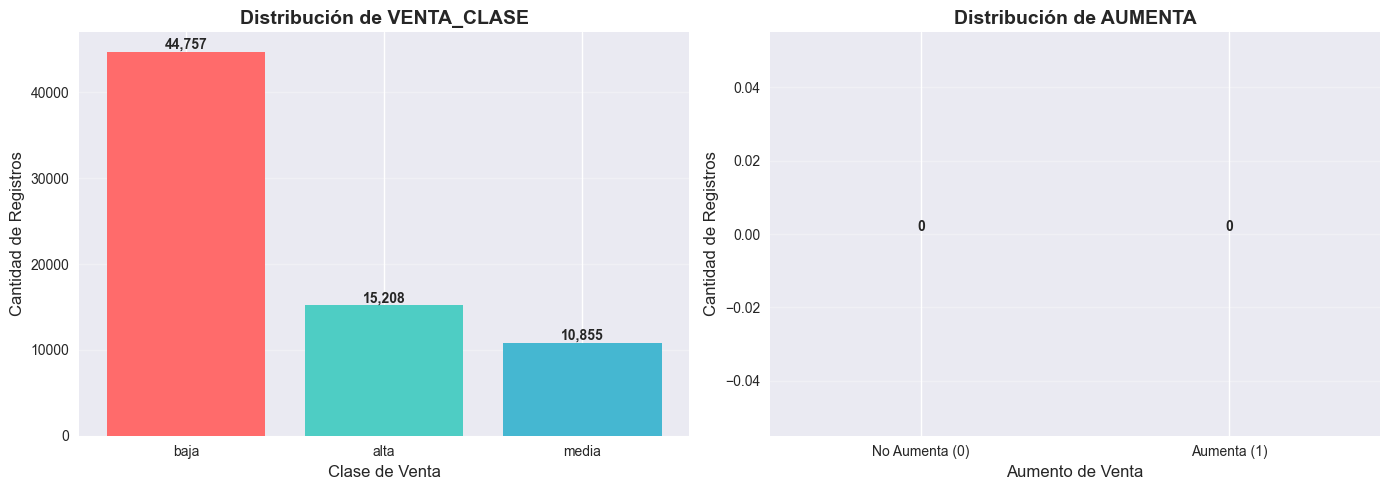


📊 DISTRIBUCIÓN DE AUMENTA
--------------------------------------------------
No Aumenta      (0): 53,828 registros (76.01%)
No Aumenta      (1): 16,992 registros (23.99%)


In [19]:
etapa_final = etapas['etapa_5_preprocesadas']

# Distribución de VENTA_CLASE
dist_venta_clase = etapa_final['distribucion_venta_clase']

print("📊 DISTRIBUCIÓN DE VENTA_CLASE")
print("-" * 50)
for clase, count in dist_venta_clase.items():
    porcentaje = (count / etapa_final['filas']) * 100
    print(f"{clase:15s}: {count:6,} registros ({porcentaje:5.2f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras VENTA_CLASE
clases = list(dist_venta_clase.keys())
counts = list(dist_venta_clase.values())
axes[0].bar(clases, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Distribución de VENTA_CLASE', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Clase de Venta', fontsize=12)
axes[0].set_ylabel('Cantidad de Registros', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(counts):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Distribución de AUMENTA
dist_aumenta = etapa_final['distribucion_aumenta']
aumenta_labels = ['No Aumenta (0)', 'Aumenta (1)']
aumenta_counts = [dist_aumenta.get(0, 0), dist_aumenta.get(1, 0)]

axes[1].bar(aumenta_labels, aumenta_counts, color=['#95A5A6', '#2ECC71'])
axes[1].set_title('Distribución de AUMENTA', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Aumento de Venta', fontsize=12)
axes[1].set_ylabel('Cantidad de Registros', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(aumenta_counts):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 DISTRIBUCIÓN DE AUMENTA")
print("-" * 50)
for valor, count in dist_aumenta.items():
    porcentaje = (count / etapa_final['filas']) * 100
    label = 'Aumenta' if valor == 1 else 'No Aumenta'
    print(f"{label:15s} ({valor}): {count:6,} registros ({porcentaje:5.2f}%)")


In [24]:
print("=" * 80)
print("💡 OBSERVACIONES Y CONCLUSIONES")
print("=" * 80)

observaciones = analisis_dp.get('observaciones', [])

for i, obs in enumerate(observaciones, 1):
    print(f"\n{i}. {obs}")

print("\n" + "=" * 80)
print("✅ Análisis del Pipeline de Data Processing Completado")
print("=" * 80)


💡 OBSERVACIONES Y CONCLUSIONES

✅ Análisis del Pipeline de Data Processing Completado


In [ ]:
# Cerrar sesión de Kedro
session.close()
print("✅ Sesión de Kedro cerrada")
